In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import statsmodels.tsa.api as smt
from statsmodels.tsa.seasonal import seasonal_decompose      #Decompositon
from statsmodels.tsa.stattools import adfuller

In [6]:
#from stldecompose import decompose,forecast      #for decomposition & forecasting
#from statsmodel.tsa.holtwinters import ExponentialSmoothing  #ETS Models

#from fbprophet import Prophet #you need to install fbprophet using pip install


In [7]:
data= pd.read_csv("Electricity Consumption.csv")
data

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107
...,...,...
556,5/1/2019,97.5860
557,6/1/2019,110.8580
558,7/1/2019,122.1014
559,8/1/2019,121.7765


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [9]:
data.columns = ['Month_Year', 'Ele_Consume_in_TW']

In [10]:
data.head(5)

,Month_Year,Ele_Consume_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [11]:
data["Year_Month"]=pd.to_datetime(data.Month_Year,format='%m/%d/%Y')

In [12]:
data.head(5)

,Month_Year,Ele_Consume_in_TW,Year_Month
0,1/1/1973,35.9728,1973-01-01
1,2/1/1973,36.1334,1973-02-01
2,3/1/1973,35.0625,1973-03-01
3,4/1/1973,33.8416,1973-04-01
4,5/1/1973,33.5107,1973-05-01


In [13]:
data['Year'] = data.Year_Month.dt.year
data['Month'] = data.Year_Month.dt.month

In [14]:
data.head(5)

,Month_Year,Ele_Consume_in_TW,Year_Month,Year,Month
0,1/1/1973,35.9728,1973-01-01,1973,1
1,2/1/1973,36.1334,1973-02-01,1973,2
2,3/1/1973,35.0625,1973-03-01,1973,3
3,4/1/1973,33.8416,1973-04-01,1973,4
4,5/1/1973,33.5107,1973-05-01,1973,5


In [15]:
data.set_index(data.Year_Month,inplace=True)

In [16]:
data

,Month_Year,Ele_Consume_in_TW,Year_Month,Year,Month
Year_Month,,,,,
1973-01-01,1/1/1973,35.9728,1973-01-01,1973,1
1973-02-01,2/1/1973,36.1334,1973-02-01,1973,2
1973-03-01,3/1/1973,35.0625,1973-03-01,1973,3
1973-04-01,4/1/1973,33.8416,1973-04-01,1973,4
1973-05-01,5/1/1973,33.5107,1973-05-01,1973,5
...,...,...,...,...,...
2019-05-01,5/1/2019,97.5860,2019-05-01,2019,5
2019-06-01,6/1/2019,110.8580,2019-06-01,2019,6
2019-07-01,7/1/2019,122.1014,2019-07-01,2019,7


In [17]:
elec = pd.Series(data.Ele_Consume_in_TW)

In [18]:
elec

Year_Month
1973-01-01     35.9728
1973-02-01     36.1334
1973-03-01     35.0625
1973-04-01     33.8416
1973-05-01     33.5107
                ...   
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Ele_Consume_in_TW, Length: 561, dtype: float64

<AxesSubplot:xlabel='Year_Month'>

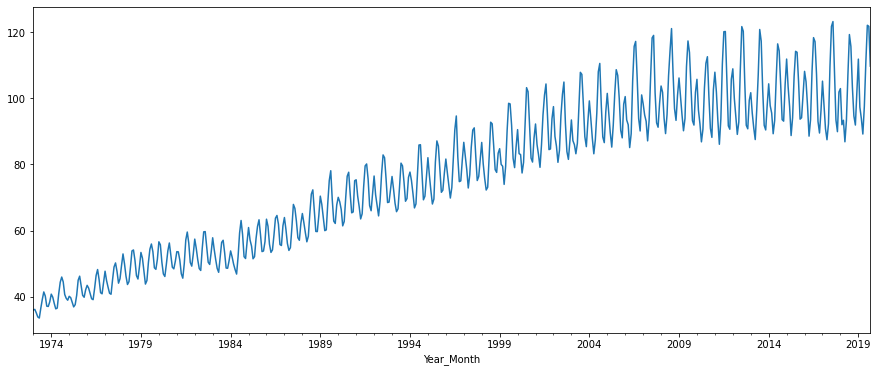

In [19]:
elec.plot(figsize=(15,6))

NOTE : This plot shows the electricity consumption from year 1974 to 2019 . Based on this we are supposed to predict next two year requirement for electricity.

In [20]:
pd.pivot_table(data= data,index='Year',columns='Month',values='Ele_Consume_in_TW')

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1973,35.9728,36.1334,35.0625,33.8416,33.5107,36.4823,39.1412,41.4137,40.1639,37.1133,37.0248,38.4341
1974,40.7455,39.8340,37.9408,36.3004,36.5293,40.8899,44.3563,45.9240,44.4555,40.6417,39.4901,38.9068
1975,40.0956,39.6944,38.3040,36.8939,37.5668,40.3832,44.9671,46.1853,43.3001,40.3836,39.8092,42.0597
1976,43.4099,42.5826,40.9244,39.3533,39.0766,42.4851,46.3693,48.1945,45.1688,41.1880,40.8431,44.1468
1977,47.6892,44.8505,42.8557,41.0177,40.7201,45.0610,48.9685,50.1898,47.5982,44.0684,45.4267,49.3447
1978,52.9153,49.9488,46.1749,43.6652,44.5402,48.9480,53.8292,54.1182,50.9980,46.3711,45.3267,49.0027
1979,53.3617,51.6279,47.8264,43.7935,44.8591,50.3292,54.3579,55.9197,53.5776,48.7261,48.2585,51.3008
1980,56.5838,55.6802,50.4428,46.8693,46.0886,49.7595,53.8273,56.2272,52.5737,48.8947,48.4081,50.6659
1981,53.5867,53.5461,51.0708,46.9172,45.5795,50.0235,57.1384,59.5376,56.1935,50.3249,49.2234,52.8176


LONG TO WIDE DATA BASED ON YEAR

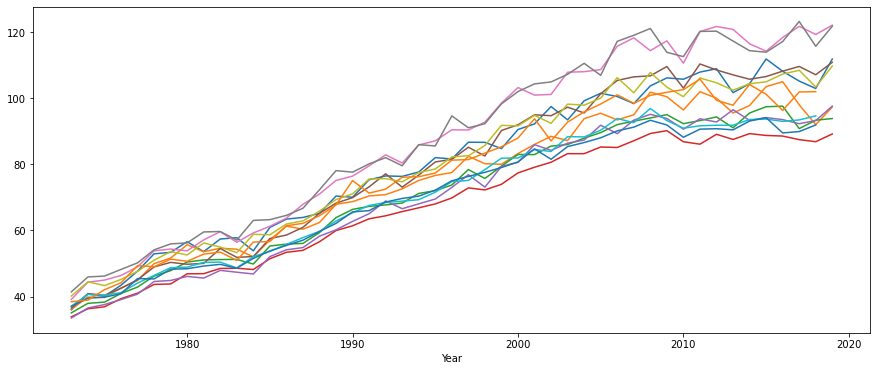

In [23]:
pivot_YM = pd.pivot_table(data=data,index='Year',columns='Month',values='Ele_Consume_in_TW').plot(legend= False, figsize=(15,6))

LONG TO WIDE DATA BASED ON MONTH

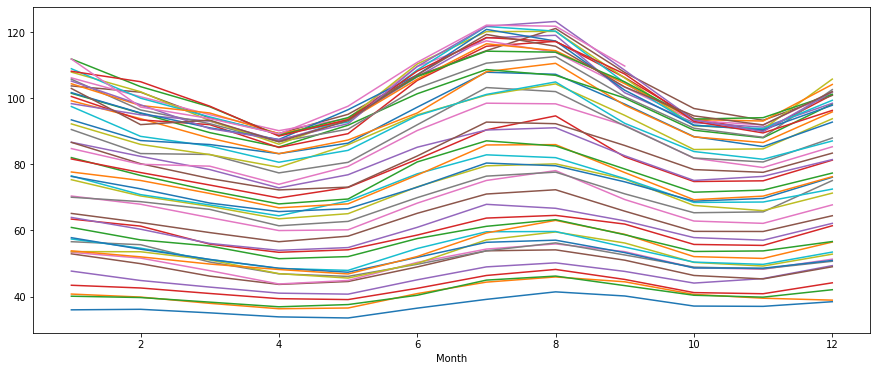

In [25]:
pivot_MY = pd.pivot_table(data=data,index='Month', columns='Year', values='Ele_Consume_in_TW').plot(legend= False,figsize=(15,6))

### Decomposition of Data

In [26]:
# from statsmodels.tsa.sesonal import sesonal_decompose

This model is used to compute sesonality , trends, residuals in the data.

In [27]:
#decompose= seasonal_decompose(elec,model='multiplicative',period=1)
decompose= seasonal_decompose(elec,model='additive',period=12)


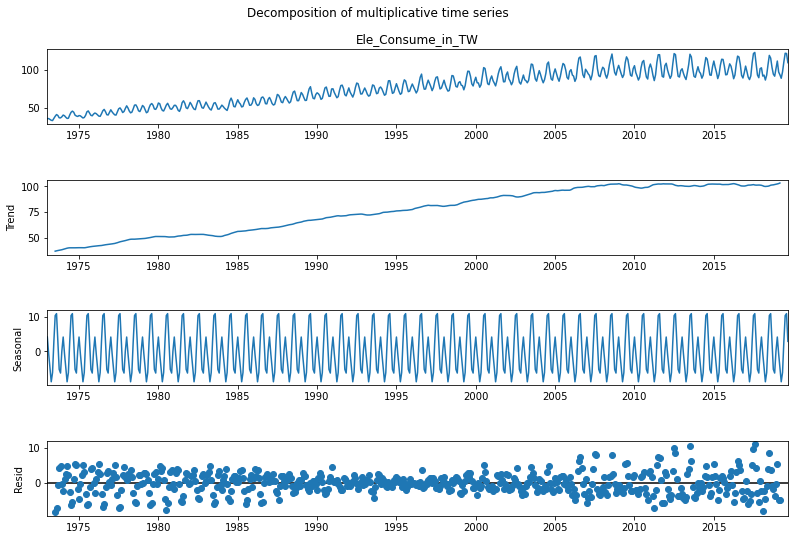

In [28]:
fig=decompose.plot()

fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [30]:
pd.concat([decompose.observed, decompose.trend, decompose.seasonal, decompose.resid], axis=1).head(12)


,Ele_Consume_in_TW,trend,seasonal,resid
Year_Month,,,,
1973-01-01,35.9728,NaN,4.135755,NaN
1973-02-01,36.1334,NaN,-0.705922,NaN
1973-03-01,35.0625,NaN,-4.489678,NaN
1973-04-01,33.8416,NaN,-8.668415,NaN
1973-05-01,33.5107,NaN,-6.044817,NaN
1973-06-01,36.4823,NaN,2.943116,NaN
1973-07-01,39.1412,37.223388,10.277826,-8.360014
1973-08-01,41.4137,37.576442,10.828421,-6.991163
1973-09-01,40.1639,37.850562,2.891998,-0.578660


In [34]:
from statsmodels.tsa.stattools import adfuller,acf,pacf_ols

In [35]:
acf(elec)

array([1.        , 0.95647392, 0.87822982, 0.82945315, 0.841529  ,
       0.88813059, 0.91122643, 0.88196658, 0.82805401, 0.80579718,
       0.84356484, 0.9092393 , 0.94048579, 0.90057994, 0.82617458,
       0.77958655, 0.79320802, 0.8397309 , 0.86221357, 0.83379379,
       0.78177625, 0.76069374, 0.79757444, 0.8619873 , 0.89139636,
       0.85166914, 0.77857553, 0.73313065])

In [36]:
pacf_ols(elec)

array([ 1.        ,  0.96010214, -0.46239143,  0.68714216,  0.45886201,
        0.1559856 , -0.18798794, -0.01014574,  0.18169407,  0.49156644,
        0.49933306,  0.5094987 ,  0.37656677, -0.41925301, -0.05163282,
       -0.13345659,  0.11005347, -0.00342721, -0.02550308,  0.01845861,
       -0.0503431 , -0.00971101,  0.057987  ,  0.2401917 ,  0.1500228 ,
       -0.12035626, -0.01871735, -0.05644169])

In [37]:
#import statsmodels.tsa.api as smt

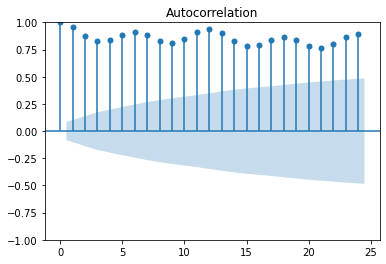

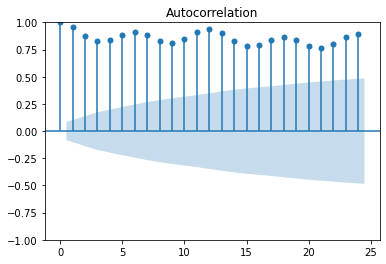

In [39]:
smt.graphics.plot_acf(elec, lags=24)

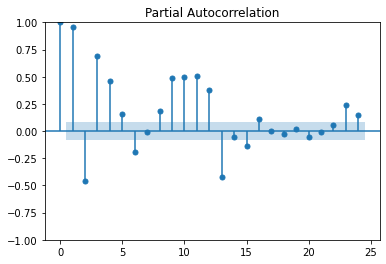

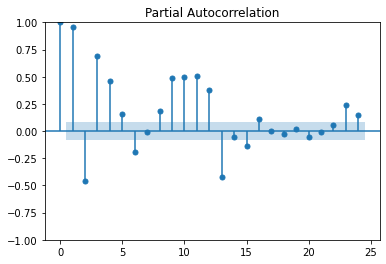

In [41]:
smt.graphics.plot_pacf(elec, lags = 24, method='ols')

In [42]:
#Is the series stationary?

# Performing Dickey-Fuller test:

#from statsmodels.tsa.stattools import adfuller

adfuller(elec)   

#p-value: 0.41032  , since p-value is high, the series(ts) is not stationary


(-1.7405933729832443,
 0.41032816044686793,
 15,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2295.409663118043)

In [43]:
elec_diff = elec.diff(1)


In [44]:
adfuller(elec_diff.dropna()) 

#p-value=3.3013438021519147e-12, since p-value<0.05, the series (ts_diff) is stationary series

(-7.941665363981184,
 3.3013438021514486e-12,
 14,
 545,
 {'1%': -3.442405720052601,
  '5%': -2.866857804790472,
  '10%': -2.5696022094099824},
 2292.555416618966)

<AxesSubplot:xlabel='Year_Month'>

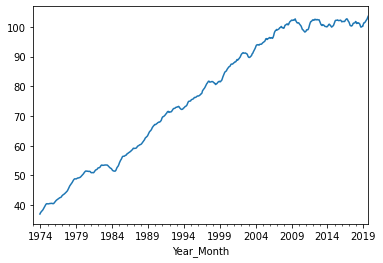

In [45]:
# Moving average

elec.rolling(window=12).mean().plot()


### ETS Model

In [46]:
# Importing packages
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error , mean_squared_error

In [48]:
# UDF to find best values of alpha, beta and gamma

def auto_hwm(timeseries, val_split_date, alpha=[None], beta=[None], gamma=[None], 
              trend=None, seasonal=None, periods=None, verbose=False):

    best_params = []
    actual = timeseries[val_split_date:]

    print('Evaluating Exponential Smoothing model for', len(alpha) * len(beta) * len(gamma), 'fits\n')

    for a in alpha:
        for b in beta:
            for g in gamma:

                    if(verbose == True):
                        print('Checking for', {'alpha': a, 'beta': b, 'gamma': g})

                    model = ExponentialSmoothing(timeseries, trend=trend, seasonal=seasonal, seasonal_periods=periods)
                    model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
                    f_cast = model.predict(model.params, start=actual.index[0])
                    score = np.where(np.float64(mean_absolute_error(actual, f_cast)/actual).mean()>0,np.float64(mean_absolute_error(actual, f_cast)/actual).mean(),0)

                    best_params.append({'alpha': a, 'beta': b, 'gamma': g, 'mae': score})

    return min(best_params, key=lambda x: x['mae'])

In [49]:
alpha = [0.1,0.2,0.3,0.4]
beta = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
gamma =[0.1,0.2,0.3,0.4,0.5,0.6]

In [50]:
elec.tail()

Year_Month
2019-05-01     97.5860
2019-06-01    110.8580
2019-07-01    122.1014
2019-08-01    121.7765
2019-09-01    109.7190
Name: Ele_Consume_in_TW, dtype: float64

In [52]:
auto_hwm(elec, val_split_date ='2019-01-01' , alpha=alpha, beta=beta, gamma=gamma, 
         trend='mul', seasonal='mul', periods=12, verbose=True)

Evaluating Exponential Smoothing model for 216 fits

Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.3}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.1, 'gamma': 0.6}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.4}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.2}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.3, 'gamma': 0.6}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.3}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\

Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.1}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.5}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.1, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.2}


C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul

Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.5}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.1, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.2}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.5}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.1, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.2}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.4}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.1}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.4}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.1, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.1}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.4}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.1}


C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul

Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.5}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.2}


C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul

Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.3, 'gamma': 0.6}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model

Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.4}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.2}


C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul

Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.5, 'gamma': 0.6}


C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul

Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.3}


C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul

Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.5}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Checking for {'alpha': 0.2, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.2}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.5}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.2, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.3}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.2, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.1}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use '

Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.5}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_

Checking for {'alpha': 0.2, 'beta': 0.9, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.2}


C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow

Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.5}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.3, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.1}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.4}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.2}


C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul

Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.4}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.1}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.3}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.4, 'gamma': 0.6}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_

Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.2}


C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul

Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.5}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_

Checking for {'alpha': 0.3, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.2}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.3}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will 

Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.3}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.7, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.2}


C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to co

Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.8, 'gamma': 0.6}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.1}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use '

Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.2}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.3}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.4}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.5}
Checking for {'alpha': 0.3, 'beta': 0.9, 'gamma': 0.6}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will 

Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.3}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.1, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.1}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\

Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.4}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.2, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.1}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.5}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' inste

Checking for {'alpha': 0.4, 'beta': 0.3, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.1}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.4}


C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul

Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.4, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.2}


C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Opt

Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.3}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_

Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.5, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.1}


C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul

Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.3}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use '

Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.6, 'gamma': 0.6}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.1}


C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow

Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.4}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.5}
Checking for {'alpha': 0.4, 'beta': 0.7, 'gamma': 0.6}


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use '

Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.1}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.2}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.3}
Checking for {'alpha': 0.4, 'beta': 0.8, 'gamma': 0.4}


C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2380634662.py:19: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model.fit(smoothing_level=a, smoothing_slope=b, smoothing_seasonal=g)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to co

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [57]:
ets_model = ExponentialSmoothing(elec, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.6, smoothing_seasonal=0.2)


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\180355486.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_model = ExponentialSmoothing(elec, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.6, smoothing_seasonal=0.2)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [58]:
ets_model.summary()


Dep. Variable:,Ele_Consume_in_TW,No. Observations:,561
Model:,ExponentialSmoothing,SSE,3675.183
Optimized:,True,AIC,1086.477
Trend:,Multiplicative,BIC,1155.752
Seasonal:,Multiplicative,AICC,1087.739
Seasonal Periods:,12,Date:,"Thu, 15 Dec 2022"
Box-Cox:,False,Time:,11:47:58
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1000000,alpha,False
smoothing_trend,0.6000000,beta,False


In [59]:
# splitting the data in train and test

train = elec[:'2018-12-01']  
test = elec['2019-01-01':]

In [60]:
ets_model_train = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5, smoothing_seasonal=0.2)

print(ets_model.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:        Ele_Consume_in_TW   No. Observations:                  561
Model:             ExponentialSmoothing   SSE                           3675.183
Optimized:                         True   AIC                           1086.477
Trend:                   Multiplicative   BIC                           1155.752
Seasonal:                Multiplicative   AICC                          1087.739
Seasonal Periods:                    12   Date:                 Thu, 15 Dec 2022
Box-Cox:                          False   Time:                         11:48:14
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.1000000                alpha                False
smoothing_trend          

C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\2333421579.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_model_train = ExponentialSmoothing(train, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.5, smoothing_seasonal=0.2)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [61]:
# Prediction for test data

etd_pred_test = ets_model.forecast(9)


In [62]:
# Prediction for train data

etd_pred_train = ets_model.fittedvalues[:'2018-12-01']


In [63]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 

MAPE_train = np.mean(np.abs(train -etd_pred_train)/train)
MAPE_test = np.mean(np.abs(test- etd_pred_test)/test)
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)


#Root Mean Squared percentage error

RMSPE_train = np.sqrt(np.mean(np.square((train - etd_pred_train) / train)))
RMSPE_train = np.sqrt(np.mean(np.square((train - etd_pred_train) / train)))
print('RMSPE of training data: ', RMSPE_train,  ' | ', 'RMSPE of testing data: ', RMSPE_train)




MAPE of training data:  0.02486968624624972  |  MAPE of testing data:  nan
RMSPE of training data:  0.03195466249218905  |  RMSPE of testing data:  0.03195466249218905


In [65]:
ets_model = ExponentialSmoothing(elec, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.6, smoothing_seasonal=0.2)


C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Teaswani Sharma\AppData\Local\Temp\ipykernel_1604\180355486.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  ets_model = ExponentialSmoothing(elec, trend='mul', seasonal='mul', seasonal_periods=12).fit(smoothing_level=0.1, smoothing_slope=0.6, smoothing_seasonal=0.2)
C:\Users\Teaswani Sharma\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [66]:
ETS_forcast_2years = (ets_model.forecast(24))
ETS_forcast_2years

2019-10-01     98.502551
2019-11-01     96.689990
2019-12-01    107.466533
2020-01-01    114.475623
2020-02-01    105.479011
2020-03-01    101.625597
2020-04-01     95.957349
2020-05-01    103.182474
2020-06-01    119.054074
2020-07-01    131.718523
2020-08-01    131.249905
2020-09-01    118.302846
2020-10-01    105.589372
2020-11-01    103.646404
2020-12-01    115.198272
2021-01-01    122.711635
2021-02-01    113.067756
2021-03-01    108.937106
2021-04-01    102.861054
2021-05-01    110.605994
2021-06-01    127.619485
2021-07-01    141.195084
2021-08-01    140.692751
2021-09-01    126.814209
Freq: MS, dtype: float64

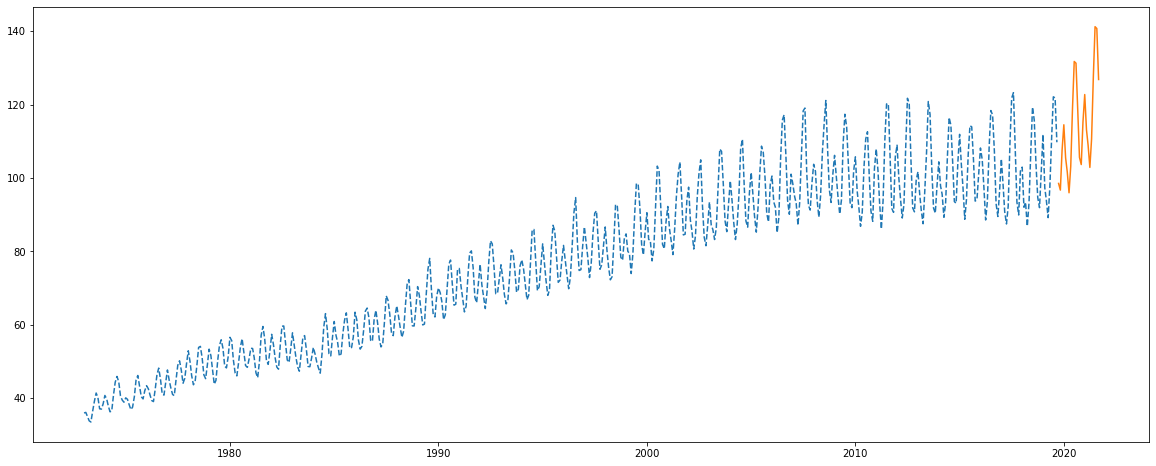

In [68]:
plt.figure(figsize=(20,8))
plt.plot(elec, '--', label='obs')
plt.plot(ETS_forcast_2years, '-', label=ETS_forcast_2years)


### SARIMA 

In [71]:
 #Data Preperation

train = elec[:'2018-12-01']
test = elec['2019-01-01':]

In [73]:
# UDF for best parameters for SARIMA

import statsmodels.api as sm
import sys
import itertools
import warnings

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])
    #return best_results


In [74]:
# checking for best parameters 

best_results = auto_arima(elec,  p=range(0, 3), d=range(2, 3), q=range(0, 3),
                         P=range(0, 3), D=range(0, 2), Q=range(0, 3)) 

SARIMAX(0, 2, 0)x(0, 0, 0, 12)12 - AIC:3718.102965366643
SARIMAX(0, 2, 0)x(0, 0, 1, 12)12 - AIC:3307.8196854190273
SARIMAX(0, 2, 0)x(0, 0, 2, 12)12 - AIC:3119.6301965529265
SARIMAX(0, 2, 0)x(0, 1, 0, 12)12 - AIC:2935.7024607601343
SARIMAX(0, 2, 0)x(0, 1, 1, 12)12 - AIC:2674.563559461636
SARIMAX(0, 2, 0)x(0, 1, 2, 12)12 - AIC:2623.577288054171
SARIMAX(0, 2, 0)x(1, 0, 0, 12)12 - AIC:2916.190407930368
SARIMAX(0, 2, 0)x(1, 0, 1, 12)12 - AIC:2707.844350488557
SARIMAX(0, 2, 0)x(1, 0, 2, 12)12 - AIC:2655.3010940090335
SARIMAX(0, 2, 0)x(1, 1, 0, 12)12 - AIC:2796.0014960868157
SARIMAX(0, 2, 0)x(1, 1, 1, 12)12 - AIC:2676.56118144197
SARIMAX(0, 2, 0)x(1, 1, 2, 12)12 - AIC:2623.245786642451
SARIMAX(0, 2, 0)x(2, 0, 0, 12)12 - AIC:2792.2599194087124
SARIMAX(0, 2, 0)x(2, 0, 1, 12)12 - AIC:2662.647995453831
SARIMAX(0, 2, 0)x(2, 0, 2, 12)12 - AIC:2653.39354017224
SARIMAX(0, 2, 0)x(2, 1, 0, 12)12 - AIC:2685.007631095578
SARIMAX(0, 2, 0)x(2, 1, 1, 12)12 - AIC:2623.622671429732
SARIMAX(0, 2, 0)x(2, 1, 2, 

SARIMAX(2, 2, 1)x(2, 1, 2, 12)12 - AIC:2164.903233258803
SARIMAX(2, 2, 2)x(0, 0, 0, 12)12 - AIC:2996.007947998522
SARIMAX(2, 2, 2)x(0, 0, 1, 12)12 - AIC:2719.7635605780906
SARIMAX(2, 2, 2)x(0, 0, 2, 12)12 - AIC:2605.6399523790124
SARIMAX(2, 2, 2)x(0, 1, 0, 12)12 - AIC:2396.5423817935243
SARIMAX(2, 2, 2)x(0, 1, 1, 12)12 - AIC:2170.673102524416
SARIMAX(2, 2, 2)x(0, 1, 2, 12)12 - AIC:2132.25254752933
SARIMAX(2, 2, 2)x(1, 0, 0, 12)12 - AIC:2395.8530781701375
SARIMAX(2, 2, 2)x(1, 0, 1, 12)12 - AIC:2190.3962903199126
SARIMAX(2, 2, 2)x(1, 0, 2, 12)12 - AIC:2150.1964763200235
SARIMAX(2, 2, 2)x(1, 1, 0, 12)12 - AIC:2274.6322194672452
SARIMAX(2, 2, 2)x(1, 1, 1, 12)12 - AIC:2173.8244012783343
SARIMAX(2, 2, 2)x(1, 1, 2, 12)12 - AIC:2132.4948016124376
SARIMAX(2, 2, 2)x(2, 0, 0, 12)12 - AIC:2278.567077314981
SARIMAX(2, 2, 2)x(2, 0, 1, 12)12 - AIC:2155.689641079964
SARIMAX(2, 2, 2)x(2, 0, 2, 12)12 - AIC:2151.400596421404
SARIMAX(2, 2, 2)x(2, 1, 0, 12)12 - AIC:2179.7456569137494
SARIMAX(2, 2, 2)x(2, 1

In [75]:
# Model for train data 

SARIMA_model_train = sm.tsa.statespace.SARIMAX(train, order = (2,2,2), seasonal_order= (2,0,2,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

print(SARIMA_model_train.summary())

                                     SARIMAX Results                                      
Dep. Variable:                  Ele_Consume_in_TW   No. Observations:                  552
Model:             SARIMAX(2, 2, 2)x(2, 0, 2, 12)   Log Likelihood               -1038.867
Date:                            Thu, 15 Dec 2022   AIC                           2095.733
Time:                                    12:08:22   BIC                           2134.070
Sample:                                01-01-1973   HQIC                          2110.747
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6393      0.045     14.166      0.000       0.551       0.728
ar.L2         -0.1101      0.047   

In [77]:
np.mean(np.abs(elec -SARIMA_model_train.fittedvalues[:'2019-09-01'])/elec)


0.021312112828048513

In [78]:
np.sqrt(np.mean(np.square(elec -SARIMA_model_train.fittedvalues[:'2019-09-01'])/elec))


0.39394993801102685

In [79]:
# Actual train and test
act_train = train
act_test = test

# Prediction for test data
SARIMA_pred_test = SARIMA_model_train.forecast(9)

# Prediction for train data
SARIMA_pred_train = SARIMA_model_train.fittedvalues[:'2018-12-01']


In [80]:
#Metrics for both training and testing data 

#Mean Absolute Percentage Error 
MAPE_train = np.mean(np.abs(train -SARIMA_pred_train)/act_train)
MAPE_test = np.mean(np.abs(test- SARIMA_pred_test)/act_test)
print('MAPE of training data: ', MAPE_train,  ' | ', 'MAPE of testing data: ', MAPE_test)

#Root Mean Squared percentage error
RMSPE_train = np.sqrt(np.mean(np.square((train - SARIMA_pred_train) / act_train)))
RMSPE_train = np.sqrt(np.mean(np.square((train - SARIMA_pred_train) / act_train)))
print('RMSPE of training data: ', RMSPE_train,  ' | ', 'RMSPE of testing data: ', RMSPE_train)

MAPE of training data:  0.021312112828048513  |  MAPE of testing data:  0.0315320863922362
RMSPE of training data:  0.06157961533890233  |  RMSPE of testing data:  0.06157961533890233


In [82]:
# Model for elec

SARIMA_model = sm.tsa.statespace.SARIMAX(elec, order = (2,2,2), seasonal_order= (2,0,2,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False).fit()

print(SARIMA_model_train.summary())



                                     SARIMAX Results                                      
Dep. Variable:                  Ele_Consume_in_TW   No. Observations:                  552
Model:             SARIMAX(2, 2, 2)x(2, 0, 2, 12)   Log Likelihood               -1038.867
Date:                            Thu, 15 Dec 2022   AIC                           2095.733
Time:                                    12:10:00   BIC                           2134.070
Sample:                                01-01-1973   HQIC                          2110.747
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6393      0.045     14.166      0.000       0.551       0.728
ar.L2         -0.1101      0.047   

In [83]:
SARIMA_forcast = SARIMA_model.forecast(24)
SARIMA_forcast


2019-10-01     96.072386
2019-11-01     93.031014
2019-12-01    103.612072
2020-01-01    110.908199
2020-02-01    101.044769
2020-03-01     95.622693
2020-04-01     89.262055
2020-05-01     96.077377
2020-06-01    111.789661
2020-07-01    124.061981
2020-08-01    123.712722
2020-09-01    109.614449
2020-10-01     95.477682
2020-11-01     92.949219
2020-12-01    104.288313
2021-01-01    110.665800
2021-02-01    101.279401
2021-03-01     96.131569
2021-04-01     89.090826
2021-05-01     95.772531
2021-06-01    112.000115
2021-07-01    124.719674
2021-08-01    123.914633
2021-09-01    109.442371
Freq: MS, Name: predicted_mean, dtype: float64

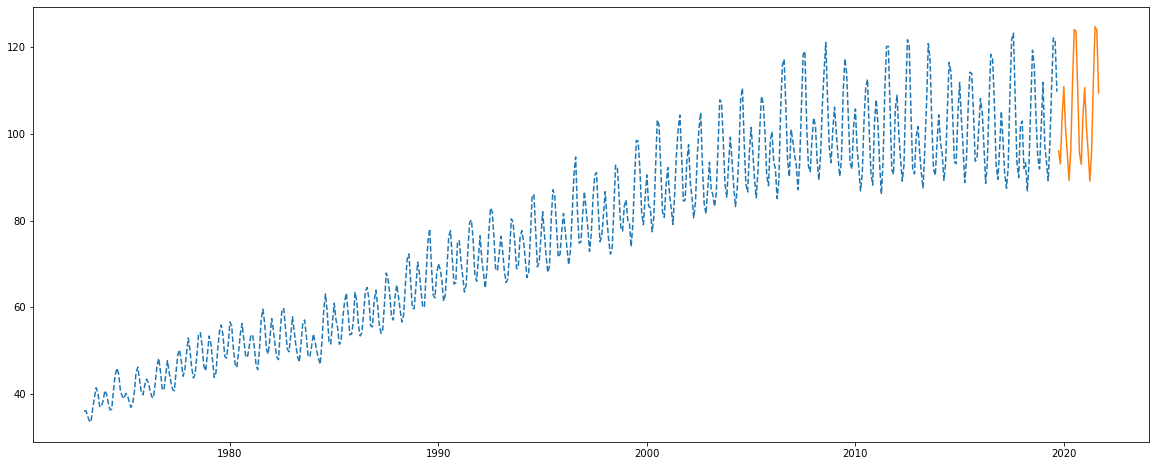

In [84]:
plt.figure(figsize=(20,8))
plt.plot(elec, '--', label='obs')
plt.plot(SARIMA_forcast, '-', label=SARIMA_forcast)

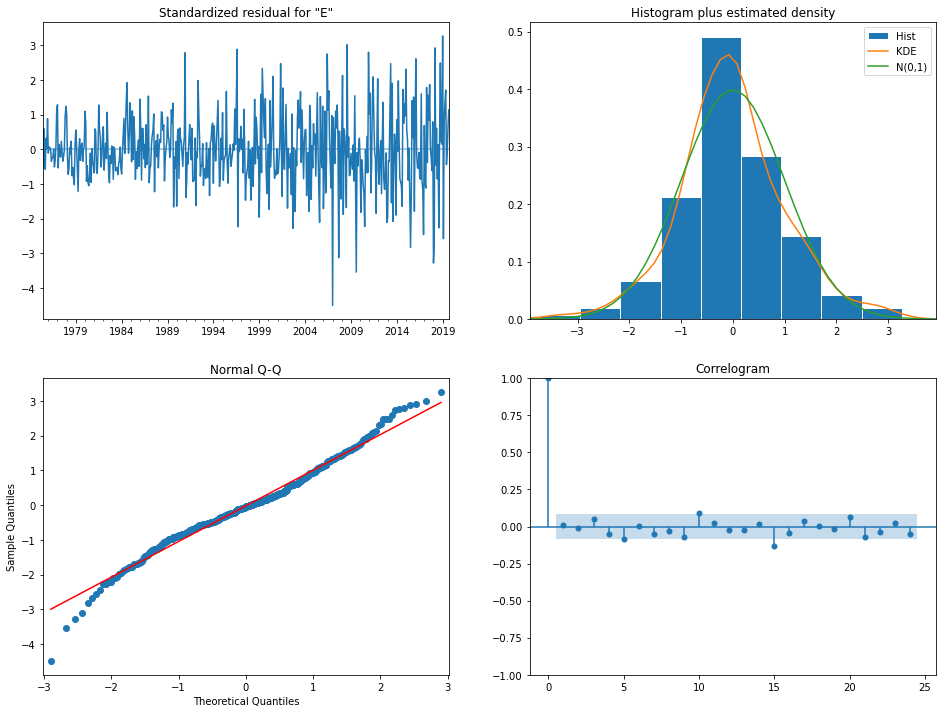

In [85]:
SARIMA_model.plot_diagnostics(lags=24, figsize=(16,12))
plt.show()

As the MAPE of ETS model and SARIMA model is almost similar but the RMSPE of SARIMA model is almost double of ETS model. So ETS model is working well as compare to SARIMA.